### Import Lib

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots

### Read Dataset

In [26]:
df_2017 = pd.read_csv('2017.csv', low_memory=False, encoding='iso-8859-1')
df_2018 = pd.read_csv('2018.csv', low_memory=False)
df_2019 = pd.read_csv('2019.csv', low_memory=False)
df_2020 = pd.read_csv('2020.csv', low_memory=False)
df_2021 = pd.read_csv('2021.csv', low_memory=False)
df_2022 = pd.read_csv('2022.csv', low_memory=False)

### Split Country 2017-2022

In [27]:
country_2017 = df_2017['Country'].value_counts()
country_2017 = pd.DataFrame(country_2017)
country_2017['year'] = 2017
country_2017 = pd.DataFrame(country_2017).reset_index()

country_2018 = df_2018['Q3'].value_counts()
country_2018 = pd.DataFrame(country_2018)
country_2018['year'] = 2018
country_2018 = pd.DataFrame(country_2018).reset_index()
country_2018 = country_2018.rename(columns={'Q3':'Country'})


country_2019 = df_2019['Q3'].value_counts()
country_2019 = pd.DataFrame(country_2019)
country_2019['year'] = 2019
country_2019 = pd.DataFrame(country_2019).reset_index()
country_2019 = country_2019.rename(columns={'Q3':'Country'})

country_2020 = df_2020['Q3'].value_counts()
country_2020 = pd.DataFrame(country_2020)
country_2020['year'] = 2020
country_2020 = pd.DataFrame(country_2020).reset_index()
country_2020 = country_2020.rename(columns={'Q3':'Country'})

country_2021 = df_2021['Q3'].value_counts()
country_2021 = pd.DataFrame(country_2021)
country_2021['year'] = 2021
country_2021 = pd.DataFrame(country_2021).reset_index()
country_2021 = country_2021.rename(columns={'Q3':'Country'})

country_2022 = df_2022['Q4'].value_counts()
country_2022 = pd.DataFrame(country_2022)
country_2022['year'] = 2022
country_2022 = pd.DataFrame(country_2022).reset_index()
country_2022 = country_2022.rename(columns={'Q4':'Country'})

country_All = pd.concat([country_2017,country_2018,country_2019,country_2020,country_2021,country_2022])

## Split Iran from dataset

In [28]:
%%capture

iran_2017 = df_2017[df_2017['Country'] == 'Iran']
iran_2018 = df_2018[df_2018['Q3'] == 'Iran, Islamic Republic of...']
iran_2019 = df_2019[df_2019['Q3'] == 'Iran, Islamic Republic of...']
iran_2020 = df_2020[df_2020['Q3'] == 'Iran, Islamic Republic of...']
iran_2021 = df_2021[df_2021['Q3'] == 'Iran, Islamic Republic of...']
iran_2022 = df_2022[df_2022['Q4'] == 'Iran, Islamic Republic of...']

Gender_map = {
    'Male' : 'Man',
    'Female' : 'Woman',
    'A different identity' : 'Other'
}
iran_2017['GenderSelect'] = iran_2017['GenderSelect'].map(Gender_map)

Gender_map1 = {
    'Male' : 'Man',
    'Female' : 'Woman',
    'Prefer not to say' : 'Other'
}
iran_2018['Q1'] = iran_2018['Q1'].map(Gender_map1)
iran_2019['Q2'] = iran_2019['Q2'].map(Gender_map1)

Gender_map2 = {
    'Man' : 'Man',
    'Woman' : 'Woman',
    'Prefer not to say' : 'Other'
}
iran_2020['Q2'] = iran_2020['Q2'].map(Gender_map2)
iran_2021['Q2'] = iran_2021['Q2'].map(Gender_map2)

Gender_map3 = {
    'Man' : 'Man',
    'Woman' : 'Woman',
    'Prefer not to say' : 'Other',
    'Nonbinary' : 'Other'
}
iran_2022['Q3'] = iran_2022['Q3'].map(Gender_map3)

iran_Count = []
iran_Count = pd.DataFrame(iran_Count)
iran_Count['2017'] = iran_2017['GenderSelect'].value_counts()
iran_Count['2018'] = iran_2018['Q1'].value_counts()
iran_Count['2019'] = iran_2019['Q2'].value_counts()
iran_Count['2020'] = iran_2020['Q2'].value_counts()
iran_Count['2021'] = iran_2021['Q2'].value_counts()
iran_Count['2022'] = iran_2022['Q3'].value_counts()

iran_Count.T.sum(axis=1)
iran_Count1 = iran_Count.T
iran_Count1['Total'] = iran_Count1.sum(axis=1)

## Combine Answer

In [29]:
%%capture


def combine(Columns,x,y):
    for i in iran_2022.iloc[:,x:y].columns:
        iran_2022[Columns] = iran_2022[Columns].fillna(iran_2022[i])

# Q6 On which platforms have you begun or completed data science courses?
combine('Q6_1',6,17)

# Q7 What products or platforms did you find to be most helpful when you first started studying data science?
combine('Q7_1',18,24)

# Q10 Did your research make use of machine learning?
combine('Q10_1',27,29)

# Q12 What programming languages do you use on a regular basis?
combine('Q12_1',31,45)

# Q13 Which of the following integrated development environments (IDE's) do you use on a regular basis?
combine('Q13_1',45,59)

# Q15 Do you use any of the following data visualization libraries on a regular basis? 
combine('Q15_1',76,90)

# Q17 Which of the following machine learning frameworks do you use on a regular basis?
combine('Q17_1',91,106)

# Q18 Which of the following ML algorithms do you use on a regular basis?
combine('Q18_1',107,120)

# Q19 Which categories of computer vision methods do you use on a regular basis?
combine('Q19_1',121,128)

# Q20 Which of the following natural language processing (NLP) methods do you use on a regular basis?
combine('Q20_1',129,134)

# Q35 Do you use any of the following data products (relational databases, data warehouses, data lakes,or similar)?
combine('Q35_1',187,202)

## Create New DataFrame

In [30]:
def dataf_new(name,columns):
    x = iran_2022[columns].value_counts()
    x = pd.DataFrame(x).reset_index()
    x = x.rename(columns={columns: name})
    return x

courses = dataf_new('Courses','Q6_1')
helpful_courses = dataf_new('Helpful Courses','Q7_1')
research = dataf_new('Research','Q10_1')
programming_languages = dataf_new('Programming Languages','Q12_1')
IDE = dataf_new('IDE','Q13_1')
visualization = dataf_new('Visualization Lib','Q15_1')
frameworks = dataf_new('Machine Learning Frameworks','Q17_1')
algorithms = dataf_new('ML Algorithms', 'Q18_1')
computer_vision = dataf_new('Computer Vision', 'Q19_1')
NLP = dataf_new('NLP', 'Q20_1')
database = dataf_new('Database', 'Q35_1')

# ***************** Visualization *****************

In [31]:
fig = px.scatter_geo(country_All, locations="Country", color="Country",locationmode='country names',
                     hover_name="Country",
                     animation_frame="year",
                     size='count',
                     projection="natural earth")
fig.show()

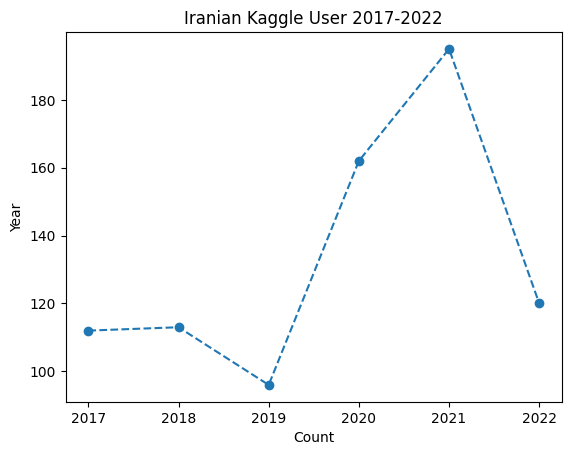

In [32]:
fig1 = px.bar(iran_Count.T,y=['Man', 'Woman', 'Other'],text_auto=True,
       title="Iranian Kaggle Users 2017-2022",
       labels={
           'value' : 'Count',
           'index' : 'Years',
           'variable' : 'Gender'
       }
       )
fig2 = plt.plot(iran_Count1.index,iran_Count1['Total'],linestyle = 'dashed', marker='o')
plt.title('Iranian Kaggle User 2017-2022')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()
fig1.show()

In [33]:
px.pie(iran_2022['Q2'],names=iran_2022['Q2'],title='Iranian Age User in 2022')

In [34]:
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'Funnel'}, {'type':'pie'}]])
fig.add_trace(go.Funnel(y=courses['Courses'],x=courses['count']), 1, 1)
fig.add_trace(go.Pie(values=courses['count'], labels=courses['Courses']), 1, 2)

fig = go.Figure(fig)
fig.update_layout(title_text='Platforms Data Science Courses - Iran 2022')
fig.update_traces(name='Category ')
fig.show()

In [35]:
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'Funnel'}, {'type':'pie'}]])
fig.add_trace(go.Funnel(y=helpful_courses['Helpful Courses'],x=helpful_courses['count']), 1, 1)
fig.add_trace(go.Pie(values=helpful_courses['count'], labels=helpful_courses['Helpful Courses']), 1, 2)

fig = go.Figure(fig)
fig.update_layout(title_text='helpful first started studying data science - Iran 2022')
fig.update_traces(name='Category ')
fig.show()

In [36]:
fig = make_subplots(rows=1, cols=2,specs=[[{'type':'Funnel'}, {'type':'Funnel'}]])
fig.add_trace(go.Funnel(y=programming_languages['Programming Languages'],x=programming_languages['count']), 1, 1)
fig.add_trace(go.Funnel(y=IDE['IDE'],x=IDE['count']), 1, 2)

fig = go.Figure(fig)
fig.update_layout(title_text='Programming Language And IDE - Iran 2022')
fig.update_traces(name='Programming Language',selector=0)
fig.update_traces(name='IDE',selector=1)
fig.show()

In [37]:
iran_2022_nafill = iran_2022.fillna('Not Answer') 
CVM = iran_2022_nafill[iran_2022_nafill['Q19_1'] != 'Not Answer']
CVM = CVM[['Q19_1','Q17_1','Q18_1']].value_counts()
CVM = pd.DataFrame(CVM)
CVM = CVM.reset_index()

fig = px.parallel_categories(CVM,dimensions=['Q19_1','Q17_1','Q18_1'],
                            labels={'Q19_1': 'Computer Vision Methods','Q17_1':'Machine Learning Frameworks','Q18_1':'ML Algorithms'},
                            title='Computer Vision Methods - Iran 2022',
                            height=600,
                            color='count',
                            color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [38]:
NLPM = iran_2022_nafill[iran_2022_nafill['Q20_1'] != 'Not Answer']
NLPM = NLPM[NLPM['Q20_1'] != 'Other']
NLPM = NLPM[['Q20_1','Q17_1','Q18_1']].value_counts()
NLPM = pd.DataFrame(NLPM)
NLPM = NLPM.reset_index()

fig = px.parallel_categories(NLPM,dimensions=['Q20_1','Q17_1','Q18_1'],
                            labels={'Q20_1': 'NLP Methods','Q17_1':'Machine Learning Frameworks','Q18_1':'ML Algorithms'},
                            title='Natural Language Processing(NLP) - Iran 2022',
                            height=600,
                            color='count',
                            color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

In [39]:
ResearchV = iran_2022_nafill[iran_2022_nafill['Q9'] == 'Yes']
ResearchV = ResearchV[['Q9','Q8','Q17_1','Q18_1','Q19_1']][ResearchV[['Q9','Q8','Q17_1','Q18_1','Q19_1']] != 'Not Answer'].dropna()
ResearchV = ResearchV.value_counts()
ResearchV = pd.DataFrame(ResearchV).reset_index()

fig = px.parallel_categories(ResearchV,dimensions=['Q8','Q17_1','Q18_1','Q19_1'],
                            labels={'Q8': 'Education','Q17_1':'Machine Learning Frameworks','Q18_1':'ML Algorithms','Q19_1': 'Computer Vision Methods'},
                            title='Computer Vision Research - Iran 2022',
                            height=600,
                            color='count',
                            color_continuous_scale=px.colors.diverging.Tealrose
                            )
fig.show()

In [40]:
ResearchNlp = iran_2022_nafill[iran_2022_nafill['Q9'] == 'Yes']
ResearchNlp = ResearchNlp[['Q9','Q8','Q17_1','Q18_1','Q20_1']][ResearchNlp[['Q9','Q8','Q17_1','Q18_1','Q20_1']] != 'Not Answer'].dropna()
ResearchNlp = ResearchNlp.value_counts()
ResearchNlp = pd.DataFrame(ResearchNlp).reset_index()

fig = px.parallel_categories(ResearchNlp[ResearchNlp['Q20_1'] != 'Other'],dimensions=['Q8','Q17_1','Q18_1','Q20_1'],
                            labels={'Q8': 'Education','Q17_1':'Machine Learning Frameworks','Q18_1':'ML Algorithms','Q20_1': 'NLP Methods'},
                            title='NLP Research - Iran 2022',
                            height=600,
                            )
fig.show()

In [41]:
MlBusiness = iran_2022_nafill[iran_2022_nafill['Q27'] != 'Not Answer']
MlBusiness = MlBusiness[MlBusiness['Q27'] != 'No (we do not use ML methods)']
MlBusiness = MlBusiness[MlBusiness['Q27'] != 'I do not know']
MlBusiness = MlBusiness[MlBusiness['Q28_1'] != 'Not Answer']

fig = px.parallel_categories(MlBusiness,dimensions=['Q27','Q28_1','Q24'],
                            labels={'Q27': 'Activity','Q17_1':'Machine Learning Frameworks','Q28_1':'Role At Work','Q24': 'Industry'},
                            title='Machine Learning Methods into Business - Iran 2022',
                            height=600,
                            )
fig.show()

In [42]:
MlBusiness = iran_2022_nafill[iran_2022_nafill['Q27'] != 'Not Answer']
MlBusiness = MlBusiness[MlBusiness['Q27'] != 'No (we do not use ML methods)']
MlBusiness = MlBusiness[MlBusiness['Q27'] != 'I do not know']
MlBusiness = MlBusiness[MlBusiness['Q28_1'] != 'Not Answer']
MlBusiness = MlBusiness[MlBusiness['Q18_1'] != 'Not Answer']

fig = px.parallel_categories(MlBusiness,dimensions=['Q27','Q17_1','Q18_1','Q24'],
                            labels={'Q27': 'Activity','Q17_1':'Machine Learning Frameworks','Q18_1':'ML Algorithms','Q24': 'Industry'},
                            title='Machine Learning Methods into Business - Iran 2022',
                            height=600,
                            )
fig.show()

In [43]:
industry = iran_2022_nafill[iran_2022_nafill['Q24'] != 'Not Answer']
industry = industry[industry['Q17_1'] != 'Not Answer']
industry = industry[industry['Q17_1'] != 'Other']
industry = industry[industry['Q18_1'] != 'Not Answer']
industry = industry[industry['Q19_1'] != 'Not Answer']
fig = px.parallel_categories(industry,dimensions=['Q24','Q17_1','Q18_1','Q19_1'],
                            labels={'Q17_1':'Machine Learning Frameworks','Q18_1':'ML Algorithms','Q24': 'Industry','Q19_1':'Computer Vision Methods'},
                            title='Computer Vision into Industry - Iran 2022',
                            height=600,
                            )
fig.show()

In [44]:
industry = industry[industry['Q20_1'] != 'Not Answer']

fig = px.parallel_categories(industry,dimensions=['Q24','Q17_1','Q18_1','Q20_1'],
                            labels={'Q17_1':'Machine Learning Frameworks','Q18_1':'ML Algorithms','Q24': 'Industry','Q20_1':'NLP Methods'},
                            title='NLP into Industry - Iran 2022',
                            height=600,
                            )
fig.show()

In [45]:
salary = iran_2022_nafill[iran_2022_nafill['Q30'] != 'Not Answer']
salary = salary[salary['Q30'] != '$0 ($USD)']
fig = px.parallel_categories(salary,dimensions=['Q3','Q2','Q11','Q16','Q23','Q24','Q30'],
                            labels={'Q3':'Gender','Q2':'Age','Q11': 'Programming Experience','Q16':'ML Experience','Q23':'Role','Q24':'Industry','Q30':'Salary'},
                            title='Salary - Iran 2022',
                            height=600,
                            )
fig.show()

In [46]:
fig = px.parallel_categories(salary,dimensions=['Q23','Q24','Q30'],
                            labels={'Q3':'Gender','Q2':'Age','Q11': 'Programming Experience','Q16':'ML Experience','Q23':'Role','Q24':'Industry','Q30':'Salary'},
                            title='Industry Salary - Iran 2022',
                            height=600,
                            )
fig.show()